# Changing current source

Power vs current after changing current source, to make sure normal operation.

In [1]:
from matplotlib.pyplot import *

In [2]:
style.use('dark_background')

In [3]:
import numpy as np

In [4]:
# note that the sign of the current controller on the controller's display is incorect. 
# It displays negative, but it's a sourcing controller.
curr_ma = [0, 1, 2, 5, 10, 20, 40, 50, 60, 80, 100, 120, 140, 160, 180, 200]
power_mw = np.array([0.08e-3, 0.59e-3, 1.46e-3, 4.8e-3, 12.2e-3, 31.9e-3, 94.9e-3, 
            0.901, 8.35, 22.7, 37.4, 50.3, 65, 78, 91, 105.6]) * 130.3/105.6

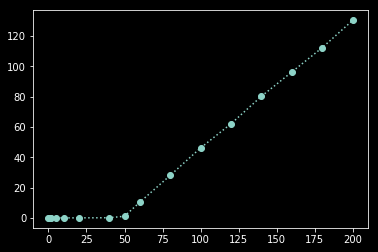

In [5]:
plot(curr_ma, power_mw, ':o')

Seems a bit below spec, roughly 15mw low at 200ma. Maybe just because of prism pair and collimating lens?

# Noise Analysis

## Current source noise

100 averages

Measured voltage a 1 Ohm resistor

In [10]:
import sys, os

In [18]:
sys.path.insert(1, os.path.join(sys.path[0], '../..'))

In [19]:
import AnalysisHelpers as ah

In [36]:
freq_JL, powers_JL = ah.load_SRS_SR780('../../Servo_data/Jila_Low.TXT')
freq_JH, powers_JH = ah.load_SRS_SR780('../../Servo_data/Jila_High.TXT')

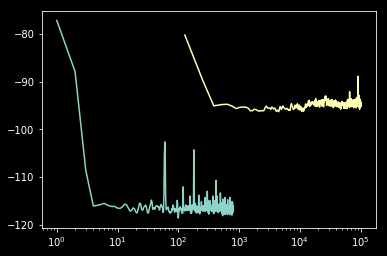

In [37]:
semilogx(freq_JL, powers_JL)
semilogx(freq_JH, powers_JH)

## Servo Noise

100 averages

seems that it's hard to tell the difference here.

In [25]:
# jila error low
freq_JEL, powers_JEL = ah.load_SRS_SR780('../../Servo_data/Jila_Error_Low.TXT')
freq_JEH, powers_JEH = ah.load_SRS_SR780('../../Servo_data/Jila_Error_High.TXT')
freq_TEL, powers_TEL = ah.load_SRS_SR780('../../Servo_data/Thorlabs_Error_Low.TXT')
freq_TEH, powers_TEH = ah.load_SRS_SR780('../../Servo_data/Thorlabs_Error_High.TXT')

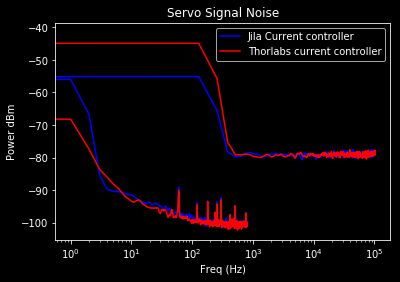

In [33]:
title('Servo Signal Noise')
semilogx(freq_JEL, powers_JEL,'b', label='_nolegend_')
xlabel('Freq (Hz)')
ylabel('Power dBm')
semilogx(freq_JEH, powers_JEH,'b', label='Jila Current controller')
semilogx(freq_TEH, powers_TEH, 'r', label='_nolegend_')
semilogx(freq_TEL, powers_TEL, 'r', label='Thorlabs current controller')
legend();